In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

df_m = pd.read_excel('./pacifier_reviews.xltx')

Setup Complete


In [2]:
frames=['marketplace','customer_id','review_id','product_parent']
df_m = df_m.drop(columns=frames)
index = df_m[(df_m['verified_purchase']=='N') | (df_m['verified_purchase']=='n')].index
df_m.drop(index, inplace=True)
index3 = df_m[(df_m['total_votes']==0) | (df_m['helpful_votes'] / df_m['total_votes'] < 0.5)].index
df_m = df_m.drop(index3)

In [3]:
# df_m.head(2)

In [4]:
df_m['star_rating'] = df_m['star_rating'].apply(lambda x: x/5)

In [5]:
df_m.head(10)

,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity
55,B003CK3LDI,wubbanub infant pacifier - giraffe,Baby,1.0,2,3,N,Y,MUST buy for new babies,I LOVE WubbaNubs. &#34;Giraffee&#34; is one of...,8/30/2015,0.294862,0.602757
70,B001AVMF10,"natursutten bpa-free natural rubber pacifier, ...",Baby,0.4,9,11,N,Y,Other brands are far superior,"Out of all the natural pacifiers out there, th...",8/28/2015,0.154163,0.467293
72,B003LVXSQI,ecopiggy rounded natural pacifier (1pk),Baby,1.0,6,8,N,Y,best one we've found,We have tried several other brands of natural ...,8/28/2015,0.009280,0.552462
86,b00lhpv5m4,ewin(r) 4pcs soft adjustable baby kids childre...,baby,0.2,1,1,n,y,the quality is very poor. waste money to buy,i want to remove the sticky mark on the yellow...,8/28/2015,-0.224000,0.256000
97,b00dqed5ya,poopoose wiggle free diaper changing pad/ chan...,Baby,1.0,1,1,N,Y,Amazing product.,Made diaper changes a breeze. Amazing product.,8/28/2015,0.600000,0.900000
105,B00GVZ6BG0,jollypop pacifier 6 pack unscented,Baby,1.0,5,5,N,Y,It seems very sturdy and is made in the USA,This is the only pacifier my daughter will tak...,8/27/2015,0.073864,0.531818
113,B007H0SFZI,beistle 66675 pin the pacifier baby shower gam...,Baby,0.6,5,5,N,Y,Not quite convenient and the creases are not v...,It's a bit of an inconvenient game because you...,8/27/2015,-0.020089,0.450893
124,B001L2SA6M,philips avent bpa free contemporary freeflow p...,Baby,1.0,1,1,N,Y,Great product - our baby loves it!,Most parents know that not all babies will use...,8/26/2015,0.129167,0.405556
142,B0028IDXDS,wubbanub brown monkey pacifier,Baby,1.0,2,2,N,Y,We love it!,This is my second one. My son loves them. The ...,8/25/2015,-0.027083,0.041667
144,B0045I6IA4,"philips avent bpa free soothie pacifier, 0-3 m...",Baby,0.2,1,2,N,Y,Not worth the money,"Um you can see inside the babies mouth, also t...",8/25/2015,-0.103571,0.371703


In [6]:
def get_score(x):
    return x['star_rating']*0.3 + x['polarity']*0.7
df_m['score'] = df_m.apply(get_score, axis=1)

In [7]:
df_m['date1'] = pd.to_datetime(df_m['review_date'])
df_m['date2'] = df_m['date1'].dt.strftime('%m/%d/%Y')

In [8]:
df_m

,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity,score,date1,date2
55,B003CK3LDI,wubbanub infant pacifier - giraffe,Baby,1.0,2,3,N,Y,MUST buy for new babies,I LOVE WubbaNubs. &#34;Giraffee&#34; is one of...,8/30/2015,0.294862,0.602757,0.506404,2015-08-30,08/30/2015
70,B001AVMF10,"natursutten bpa-free natural rubber pacifier, ...",Baby,0.4,9,11,N,Y,Other brands are far superior,"Out of all the natural pacifiers out there, th...",8/28/2015,0.154163,0.467293,0.227914,2015-08-28,08/28/2015
72,B003LVXSQI,ecopiggy rounded natural pacifier (1pk),Baby,1.0,6,8,N,Y,best one we've found,We have tried several other brands of natural ...,8/28/2015,0.009280,0.552462,0.306496,2015-08-28,08/28/2015
86,b00lhpv5m4,ewin(r) 4pcs soft adjustable baby kids childre...,baby,0.2,1,1,n,y,the quality is very poor. waste money to buy,i want to remove the sticky mark on the yellow...,8/28/2015,-0.224000,0.256000,-0.096800,2015-08-28,08/28/2015
97,b00dqed5ya,poopoose wiggle free diaper changing pad/ chan...,Baby,1.0,1,1,N,Y,Amazing product.,Made diaper changes a breeze. Amazing product.,8/28/2015,0.600000,0.900000,0.720000,2015-08-28,08/28/2015
105,B00GVZ6BG0,jollypop pacifier 6 pack unscented,Baby,1.0,5,5,N,Y,It seems very sturdy and is made in the USA,This is the only pacifier my daughter will tak...,8/27/2015,0.073864,0.531818,0.351705,2015-08-27,08/27/2015
113,B007H0SFZI,beistle 66675 pin the pacifier baby shower gam...,Baby,0.6,5,5,N,Y,Not quite convenient and the creases are not v...,It's a bit of an inconvenient game because you...,8/27/2015,-0.020089,0.450893,0.165938,2015-08-27,08/27/2015
124,B001L2SA6M,philips avent bpa free contemporary freeflow p...,Baby,1.0,1,1,N,Y,Great product - our baby loves it!,Most parents know that not all babies will use...,8/26/2015,0.129167,0.405556,0.390417,2015-08-26,08/26/2015
142,B0028IDXDS,wubbanub brown monkey pacifier,Baby,1.0,2,2,N,Y,We love it!,This is my second one. My son loves them. The ...,8/25/2015,-0.027083,0.041667,0.281042,2015-08-25,08/25/2015
144,B0045I6IA4,"philips avent bpa free soothie pacifier, 0-3 m...",Baby,0.2,1,2,N,Y,Not worth the money,"Um you can see inside the babies mouth, also t...",8/25/2015,-0.103571,0.371703,-0.012500,2015-08-25,08/25/2015


In [9]:
# import datetime
# df_m['year'] = pd.DatetimeIndex(df_m['review_date']).year
# df_m['month'] = pd.DatetimeIndex(df_m['review_date']).month
# df_m['day'] = pd.DatetimeIndex(df_m['review_date']).day

In [18]:
df_res = df_m.groupby('date2').agg(
    {'score': 'mean'}
)

In [24]:
df_res=df_res.reset_index()

In [26]:
import datetime
df_res['year'] = pd.DatetimeIndex(df_res['date2']).year
df = df_res.groupby('year').agg(
    {'score': 'mean'}
)

In [29]:
df=df.reset_index()

Text(0.5, 1.0, 'Pacifier')

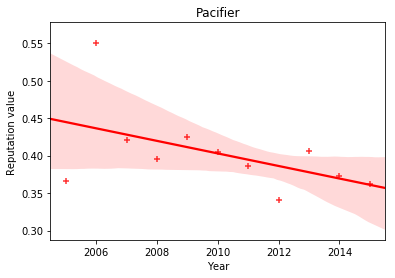

In [30]:
ax = sns.regplot(x='year', y='score', data=df, color='red', marker='+')

ax.set(xlabel='Year', ylabel='Reputation value') # add x- and y-labels
ax.set_title('Pacifier') # add title

In [11]:
# df_res.index.dtype_str()

In [12]:
# sns.lineplot(data=df_res)

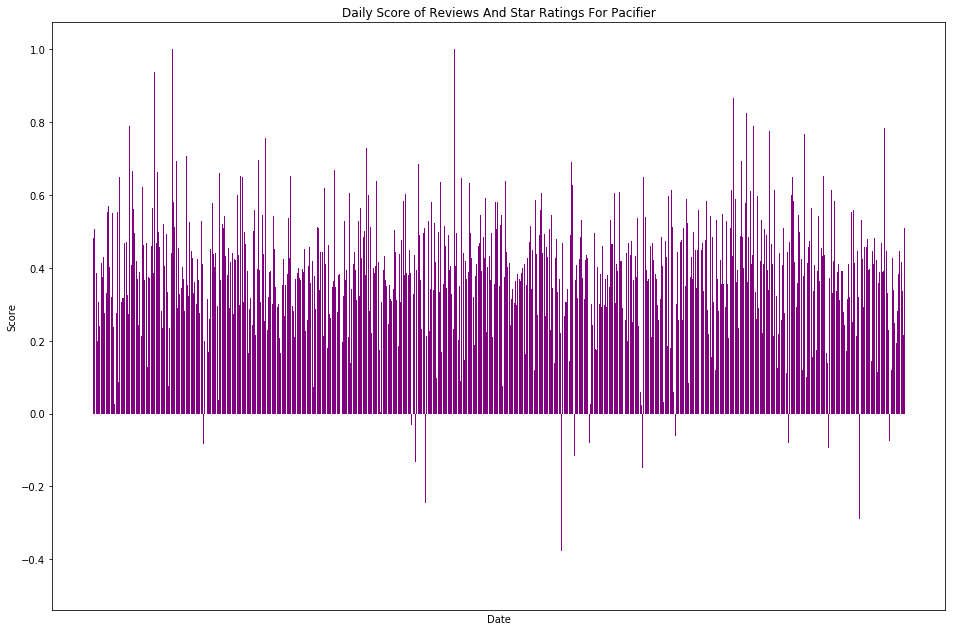

In [13]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(16, 12))

# Add x-axis and y-axis
ax.bar(df_res.index,
       df_res['score'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Score",
       title="Daily Score of Reviews And Star Ratings For Pacifier")

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
fig.autofmt_xdate()

plt.show()

In [22]:
import datetime
df_res['year'] = pd.DatetimeIndex(df_res['date2']).year
# df = df_res.groupby('year').agg(
#     {'score': 'mean'}
# )

KeyError: 'date2'